# Classifying Colleges Using K Means Clustering 

The following is a relatively simple example of K-means clustering using scikit-learn. Given and unlabled dataset of colleges and universitites, the algorithm below will classify them as private or public based on their commonly shared charistics. As is shown below, this method can easily be adapted to datasets where more than two groups are suspected.

### Import Libraries

Importing the Python libraries typically used for data analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### The Data

The 'College_Data.csv' file contains a data frame with 777 observations of following 18 variables.

* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

NOTE: K-means clustering is an *unsupervised* machine learing algorithm that is not ordinarily used in cases like this one where the data outcome (here, Public or Private) is already known. Rather, it is used in cased where such classifiacations are unknown to assist in identifying potential groupings. However, using this known dataset here aids in discussion of our results.

In [2]:
#read in the data and check the head of the dataframe
colleges = pd.read_csv('College_Data',index_col=0)
colleges.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


A graphical look at the data aids our understanding of its charicteristics, and this in turn helps decision making as we move forward with the algorithm. Two of the many potential plots that could be constructed to aid this understanding are shown below:

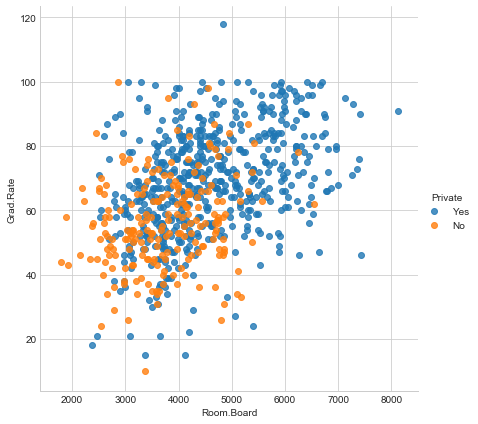

In [4]:
sns.set_style('whitegrid')
sns.lmplot('Room.Board','Grad.Rate',data=colleges, hue='Private',
           size=6,aspect=1,fit_reg=False)

**Create a scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.**

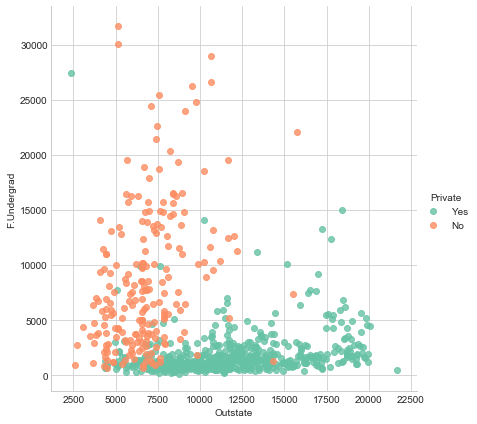

In [5]:
sns.set_style('whitegrid')
sns.lmplot('Outstate','F.Undergrad',data=colleges, hue='Private',
           palette='Set2',size=6,aspect=1,fit_reg=False)

** Notice that without the labels, the first plot would not necessarily, give the impression that the data is separable into two (or more groups). However, the shape of the data in the second plot does give an impression that ther may be grouping - even without considering color. **

### K Means Cluster Creation

With an idea of how the data may be grouping in mind, the process of testing the theory is easy thanks to scikit-learn.

In [6]:
# import KMeans from scikit-learn
from sklearn.cluster import KMeans

Creating a K Means model with 2 clusters.

In [7]:
kmeans = KMeans(n_clusters=2)

Fitting the model to the data (except for the Public/Private data label).

In [9]:
kmeans.fit(colleges.drop('Private',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

**Cluster center vectors:**
The K-means algorithm performs its task by attempting to cluster the data based on feature similarity. Above, we specified 2 clusters. This caused the program to assume there are two groups with the data. It creates two center points for these clusters called centroids. Each centroid of a cluster is a collection of feature values which define the resulting groups. At first the centroids are random, and the program assigns every data objects to the closest centroid. Then, new centroid locations are defined based on how the data has grouped. The data is re-grouped according to the new centroid locations. This process continues until the centroids have reached a location where none of the data needs to be re-grouped.

Once the process has finished, Kmeans has assigned a label to each data object in the set. Here a 1 or 0 becaused we asked for just two centroids:

In [22]:
labels = pd.Series(kmeans.labels_)
labels.head()
# the first 5 schools were labeled as 0 (public)

0    0
1    0
2    0
3    0
4    0
dtype: int32

### Model Evaluation

Evaluating the clustering of unlabeled data is an art form. For purposes of this demonstration, we do have the labels and can fully evaluate Kmeans' performance:

In [11]:
# Create a new column for colleges called 'Cluster', which is a 1 for a Private school, and a 0 for a public school.
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [13]:
colleges['Cluster'] = colleges['Private'].apply(converter)

In [27]:
# Create a new column for the labels Kmeans gave to the data
colleges['label'] = pd.Series(kmeans.labels_, index=colleges.index)

In [28]:
colleges.head(2)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster,label
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1,0
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1,0


A confusion matrix and classification report can quickly show how well the Kmeans clustering worked by comparing its result to the actual data labels.

In [16]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(colleges['Cluster'],kmeans.labels_))
print(classification_report(colleges['Cluster'],kmeans.labels_))

[[138  74]
 [531  34]]
             precision    recall  f1-score   support

          0       0.21      0.65      0.31       212
          1       0.31      0.06      0.10       565

avg / total       0.29      0.22      0.16       777



### Conclusion
There are certainly some mislabled schools here, but keep in mind that Kmeans was operating unsupervised. That is, it had no label information available to verify whether or not it was on the right track. Consider the following plot: 

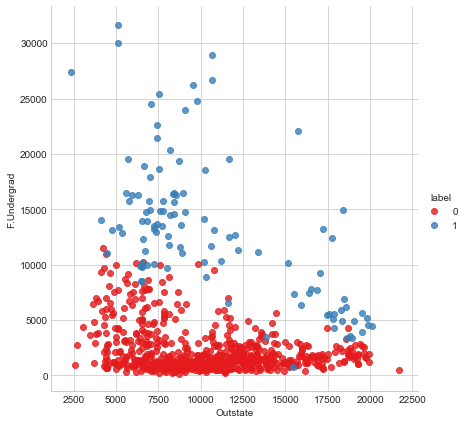

In [30]:
sns.set_style('whitegrid')
sns.lmplot('Outstate','F.Undergrad',data=colleges, hue='label',
           palette='Set1',size=6,aspect=1,fit_reg=False)

This is a recreation of the out-of-state student plot constructed above except this plot uses the labels Kmeans came up with rather than the true Public/Private labels. Kmeans was able to identify that group of private schools along the bottom edge of the plot, but had trouble grouping the more noisy data around the bottom right corner. ll in all, it appears to have been on the right track, and we can see why this algorithm has become commonly used in many analytical contexts.